In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')


In [37]:
!pip install warnings

In [38]:
!pip install WordCloud

In [5]:
df = pd.read_csv('amazon_top500.csv')
df

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN
...,...,...,...,...,...,...,...
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,NaN,NaN
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,NaN,NaN
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,NaN,NaN
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,NaN,NaN


In [6]:
df.tail()

,title,brand,description,price/currency,price/value,stars,reviewsCount
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,NaN,NaN
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,NaN,NaN
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,NaN,NaN
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,NaN,NaN
499,MULS L19M3PD9 57Wh Laptop Battery Replacement ...,MULS,NaN,$,75.99,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           500 non-null    object 
 1   brand           500 non-null    object 
 2   description     255 non-null    object 
 3   price/currency  470 non-null    object 
 4   price/value     470 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 27.5+ KB


In [6]:
df.isnull().sum()

title               0
brand               0
description       245
price/currency     30
price/value        30
stars             241
reviewsCount      241
dtype: int64

In [8]:
df['title'].nunique()

499

In [9]:
df.drop(['stars','reviewsCount'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

title             0
brand             0
description       0
price/currency    0
price/value       0
dtype: int64

In [10]:
df.shape

(240, 5)

In [11]:
df.head()

,title,brand,description,price/currency,price/value
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99
7,"50PCS Singer Stickers for Adults, Waterproof V...",JSYAVG,Quantity: 50Pcs/pack.Non-duplicateMaterial: Su...,$,5.99
8,100 Pieces Cute Dog Stickers Puppy Decals Wate...,ROTY,Package Include:100pcs Stickers Performance: ...,$,7.99
11,"Gogoonike Vertical Laptop Stand, Laptop Holder...",Gogoonike,Vertical Laptop Stand Holder,$,9.99


In [11]:
df.groupby('brand').agg({'description':'count'}).sort_values('description',ascending=False)

,description
brand,
Generic,11
ANCBD,4
PEHDPVS,4
Yebiseven,4
MOSISO,4
...,...
Inateck,1
JUJUMAY,1
JZZSIEY,1


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\The
[nltk_data]     Smart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
with pd.option_context('display.max_colwidth',None):
    display(df)

,title,brand,description,price/currency,price/value
2,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard",MOQIAN,"100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.",$,5.99
4,ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh,ANCBD,"Specification: Battery Rating: 11.55V Battery Capacity:48Wh/4160mAh Battery Type: Li-Polymer battery Condition: new battery Battery Color: Black Warranty: 12 Months Compatible Part Numbers: C31N1824 0B200-03290000 3ICP3/91/91 C31PnC1. Compatible Machine Models: For ASUS Chromebook Flip C434 Series: For ASUS Chromebook Flip C434TA Series: C434, C434TA, C434TA-1A C434TA-AI0029, C434TA-AI0030, C434TA-AI0033, C434TA-AI0040, C434TA-AI0041, C434TA-AI0043, C434TA-AI0043P C434TA-AI0045, C434TA-AI0051, C434TA-AI0060, C434TA-AI0062, C434TA-AI0063, C434TA-AI0064, C434TA-AI0080 C434TA-AI0081, C434TA-AI0084, C434TA-AI0089, C434TA-AI0094, C434TA-AI0095 C434TA-AI0107, C434TA-AI0108, C434TA-AI0109, C434TA-AI0110, C434TA-AI0115, C434TA-AI0121, C434TA-AI0122 C434TA-AI0207, C434TA-AI0225, C434TA-AI0234, C434TA-AI0259, C434TA-AI0264, C434TA-AI0276, C434TA-AI0278, C434TA-AI0296 C434TA-AI0303, C434TA-AI0304, C434TA-AI0362, C434TA-AI0364, C434TA-AI0390, C434TA-AI0394, C434TA-AI3860 C434TA-AI0403, C434TA-AI0476, C434TA-AI0477, C434TA-AI0485, C434TA-AI049, C434TA-AI0499 C434TA-AI0543, C434TA-AI0544,C434TA-AIZ030, C434TA-AIZ032 C434TA-DH342T, C434TA-DS384, C434TA-DS384T, C434TA-DS584, C434TA-DS588T, C434TA-DSM4T C434TA-E10001, C434TA-E10008, C434TA-E10011, C434TA-E10012, C434TA-E10013, C434TA-E10022 C434TA-GE384T, C434TA-GE588T, C434TA-I5-VEOUK, C434TA-M3-VEOUK, C434TA-YZ588T Compatible Part Numbers: BP3S1P2160, BP3S1P2160-S, BP3S1P2290, BP3S1P2290 A, GBM3X2 242857100001, 242888700087, 441857100001, 441888700086, 2ICP7/64/84, 3ICP6/51/61. Compatible Machine Models: Fit for Getac F110 Tablet PC Series: Getac F110 Getac F110 G2 Getac F110 G3 Getac F110 G4 F110, F110 G2 F110 GGA 734020 F110 G2-Core i5 5300U 2 3 GHZ",$,46.99
7,"50PCS Singer Stickers for Adults, Waterproof Vinyl Decal Stickers for Water Bottle, Laptop, Skateboard,Funny Music Decorations Stickers for Kids,Teens,Girls,",JSYAVG,"Quantity: 50Pcs/pack.Non-duplicateMaterial: Sun Protection and Waterproof PVCSize :2-3.5inchFeatures:Good stickiness and can be reused.Anti-wrinkling,safe and non-toxic.Sun protection,waterproof and durable!Easy to remove and do not leave a residue.100% new with high-definition printing clear and color balanced.Every sticker is different.No repeats.All as shown in picture!Perfect for kids to DIY their personal belongings such as waterbottle laptop or Skateboard ,Bikes ,etcHow to use:Clean the surface and keep it have no water, then stick on wherever you like.Do you want to have a different state yourself? Come and have these inspirational stickers and meet a different you!",$,5.99
8,"100 Pieces Cute Dog Stickers Puppy Decals Waterproof Vinyl Gifts for Laptop, Water Bottle,Phone, Luggage, Teens Adults Kids Boys Girls Birthday Party Supplies Decoration",ROTY,"Package Include:100pcs Stickers Performance: Sun-proof and Waterproof Surprise Gifts:Great gifts for your kids, friends, lovers, and family on Christmas, children's day, Easter, Valentine's day, birthday, etc. Personalized Decoration:These stickers pack can be used on electronic products such as Water Bottle, Laptop, Suitcase, Headset, Luggage, Helmet, Car, Bicycle, Fridge, Table, Phone Case, Cooler, Surfboard, computers, Swimming Ring, Lunch Boxes, Skateboard, Guitar, Binder, Scrapbooking, Diary, Desks, Walls, Window, Room and Furniture, etc.",$,7.99
11,"Gogoonike Vertical Laptop Stand, Laptop Holder with Adjustable Dock, ABS Plastic D

In [19]:
df.drop('price/currency',axis=1,inplace=True)

In [20]:
df

,title,brand,description,price/value
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,5.99
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,46.99
7,"50PCS Singer Stickers for Adults, Waterproof V...",JSYAVG,Quantity: 50Pcs/pack.Non-duplicateMaterial: Su...,5.99
8,100 Pieces Cute Dog Stickers Puppy Decals Wate...,ROTY,Package Include:100pcs Stickers Performance: ...,7.99
11,"Gogoonike Vertical Laptop Stand, Laptop Holder...",Gogoonike,Vertical Laptop Stand Holder,9.99
...,...,...,...,...
492,"Shakespeare Writer Stickers for Teen Laptop, 5...",OYZX,50pcs Classic Writer Shakespeare Poems Sticker...,3.99
493,SUYANGLIU 50pcs Cute Animal Stickers for Kids ...,SUYANGLIU,"STICKERS 50pcs / pack,Size:3.5*3.5*05inch.Wate...",3.99
494,"ETRONIK Puffy Laptop Sleeve 15 Inch 16 Inch, L...",ETRONIK,TRONIK Laptop Sleeve 15-16 Inch Laptop Sleeve....,29.99
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,5.99


In [22]:
from textblob import TextBlob

In [21]:
!pip install TextBlob

In [24]:
df['sentiment_score'] = df['description'].map(lambda x : TextBlob(x).sentiment.polarity)

In [25]:
df

,title,brand,description,price/value,sentiment_score
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,5.99,-0.100000
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,46.99,0.123232
7,"50PCS Singer Stickers for Adults, Waterproof V...",JSYAVG,Quantity: 50Pcs/pack.Non-duplicateMaterial: Su...,5.99,0.105195
8,100 Pieces Cute Dog Stickers Puppy Decals Wate...,ROTY,Package Include:100pcs Stickers Performance: ...,7.99,0.000000
11,"Gogoonike Vertical Laptop Stand, Laptop Holder...",Gogoonike,Vertical Laptop Stand Holder,9.99,0.000000
...,...,...,...,...,...
492,"Shakespeare Writer Stickers for Teen Laptop, 5...",OYZX,50pcs Classic Writer Shakespeare Poems Sticker...,3.99,0.083333
493,SUYANGLIU 50pcs Cute Animal Stickers for Kids ...,SUYANGLIU,"STICKERS 50pcs / pack,Size:3.5*3.5*05inch.Wate...",3.99,0.208333
494,"ETRONIK Puffy Laptop Sleeve 15 Inch 16 Inch, L...",ETRONIK,TRONIK Laptop Sleeve 15-16 Inch Laptop Sleeve....,29.99,0.000000
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,5.99,0.211616


In [26]:
df['Sentiments_labels'] = df['sentiment_score'].apply(lambda x: 'Negatif' if x < 0 else ('Positif' if x > 0 else 'Nötr'))

In [27]:
df

,title,brand,description,price/value,sentiment_score,Sentiments_labels
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,5.99,-0.100000,Negatif
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,46.99,0.123232,Positif
7,"50PCS Singer Stickers for Adults, Waterproof V...",JSYAVG,Quantity: 50Pcs/pack.Non-duplicateMaterial: Su...,5.99,0.105195,Positif
8,100 Pieces Cute Dog Stickers Puppy Decals Wate...,ROTY,Package Include:100pcs Stickers Performance: ...,7.99,0.000000,Nötr
11,"Gogoonike Vertical Laptop Stand, Laptop Holder...",Gogoonike,Vertical Laptop Stand Holder,9.99,0.000000,Nötr
...,...,...,...,...,...,...
492,"Shakespeare Writer Stickers for Teen Laptop, 5...",OYZX,50pcs Classic Writer Shakespeare Poems Sticker...,3.99,0.083333,Positif
493,SUYANGLIU 50pcs Cute Animal Stickers for Kids ...,SUYANGLIU,"STICKERS 50pcs / pack,Size:3.5*3.5*05inch.Wate...",3.99,0.208333,Positif
494,"ETRONIK Puffy Laptop Sleeve 15 Inch 16 Inch, L...",ETRONIK,TRONIK Laptop Sleeve 15-16 Inch Laptop Sleeve....,29.99,0.000000,Nötr
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,5.99,0.211616,Positif


In [28]:
# 5 brands with the most positive reviews.

df[df['Sentiments_labels']=='Positif'].groupby(['brand','Sentiments_labels']).agg({'description':'count'}).sort_values('description',ascending=False).head()

,,description
brand,Sentiments_labels,
Generic,Positif,9
MOSISO,Positif,4
FULLCOM,Positif,4
PEHDPVS,Positif,4
Yebiseven,Positif,4


In [29]:
# The 5 brands with the most negative reviews.

df[df['Sentiments_labels']=='Negatif'].groupby(['brand','Sentiments_labels']).agg({'description':'count'}).sort_values('description',ascending=False).head()

,,description
brand,Sentiments_labels,
MOQIAN,Negatif,2
RKINC,Negatif,2
ANCBD,Negatif,1
CQCEO,Negatif,1
Elvoes,Negatif,1


In [30]:
# Top 5 brands with the most neutral reviews.

df[df['Sentiments_labels']=='Nötr'].groupby(['brand','Sentiments_labels']).agg({'description':'count'}).sort_values('description',ascending=False).head()

,,description
brand,Sentiments_labels,
ANVMSRO,Nötr,3
Amazon Basics,Nötr,3
MOYYI,Nötr,2
OBERSTER,Nötr,2
dokikalos,Nötr,1


<AxesSubplot:ylabel='Sentiments_labels'>

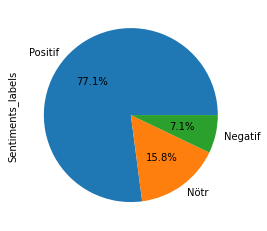

In [31]:
# Average of positive, negative and neutral comments and visualisation in a pie chart.

df['Sentiments_labels'].value_counts().plot.pie(autopct='%1.1f%%')

In [32]:
df

,title,brand,description,price/value,sentiment_score,Sentiments_labels
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,5.99,-0.100000,Negatif
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,46.99,0.123232,Positif
7,"50PCS Singer Stickers for Adults, Waterproof V...",JSYAVG,Quantity: 50Pcs/pack.Non-duplicateMaterial: Su...,5.99,0.105195,Positif
8,100 Pieces Cute Dog Stickers Puppy Decals Wate...,ROTY,Package Include:100pcs Stickers Performance: ...,7.99,0.000000,Nötr
11,"Gogoonike Vertical Laptop Stand, Laptop Holder...",Gogoonike,Vertical Laptop Stand Holder,9.99,0.000000,Nötr
...,...,...,...,...,...,...
492,"Shakespeare Writer Stickers for Teen Laptop, 5...",OYZX,50pcs Classic Writer Shakespeare Poems Sticker...,3.99,0.083333,Positif
493,SUYANGLIU 50pcs Cute Animal Stickers for Kids ...,SUYANGLIU,"STICKERS 50pcs / pack,Size:3.5*3.5*05inch.Wate...",3.99,0.208333,Positif
494,"ETRONIK Puffy Laptop Sleeve 15 Inch 16 Inch, L...",ETRONIK,TRONIK Laptop Sleeve 15-16 Inch Laptop Sleeve....,29.99,0.000000,Nötr
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,5.99,0.211616,Positif


In [33]:


df.groupby(['Sentiments_labels','price/value']).agg({'description':'count'}).sort_values('description',ascending=False)

description
Sentiments_labels price/value             
Positif           5.99                  18
                  3.99                   8
                  6.99                   8
                  4.99                   8
                  9.99                   7
...                                    ...
Nötr              194.97                 1
                  99.99                  1
                  62.99                  1
                  55.79                  1
Positif           575.00                 1

[138 rows x 1 columns]

In [53]:
df.to_csv( 'cleaned_data.csv',index=False)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 2 to 496
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              240 non-null    object 
 1   brand              240 non-null    object 
 2   description        240 non-null    object 
 3   price/value        240 non-null    float64
 4   sentiment_score    240 non-null    float64
 5   Sentiments_labels  240 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.1+ KB
